# 📝 Green Taxis Exercise Notebook


## 📦 Dependencies
You will need the following libraries:

- `pandas`
- `numpy`
- `seaborn`
- `matplotlib`

Please install them using pip, then import them.


In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 🧹 Data Cleaning
In this section, you will perform basic data cleaning tasks such as:
- Handling missing values
- Fixing column names
- Fixing data types
- Removing duplicates
- Handling outliers
- validating data

### 🔗 Documentation Links
- [Pandas Documentation](https://pandas.pydata.org/docs/)
- [NumPy Documentation](https://numpy.org/doc/)

### Other Resources
- [Data Cleaning](https://infomineo.com/blog/data-cleaning-proven-strategies-and-best-practices-to-get-it-right/)
- [Column Names Conventions](https://www.cojolt.io/blog/database-column-naming-conventions#:~:text=It%20is%20generally%20a%20good,you%20choose%20PascalCase%20or%20camelCase%20.)



In [16]:
df = pd.read_csv("green_tripdata_2019-09.csv", low_memory=False)


In [17]:
df = pd.read_csv("green_tripdata_2019-09.csv")

print("Initial Shape:", df.shape)
df.head()


C:\Users\SRezk\AppData\Local\Temp\ipykernel_20916\4007400798.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("green_tripdata_2019-09.csv")


Initial Shape: (449075, 20)


,Vendor,lpep pickup datetime,lpep dropoff datetime,store and fwd flag,Rate type,PU Location,DO Location,passenger count,trip distance,fare amount,extra,mta tax,tip amount,tolls amount,ehail fee,improvement surcharge,total amount,payment type,trip type,congestion surcharge
0,VeriFone Inc.,2019-09-01 00:10:53,2019-09-01 00:23:46,N,Standard rate,"Brooklyn,Downtown Brooklyn/MetroTech","Brooklyn,Prospect Heights",5.0,2.00,10.5,0.5,0.5,2.36,0.0,NaN,0.3,14.16,Credit card,Street-hail,0.0
1,VeriFone Inc.,2019-09-01 00:31:22,2019-09-01 00:44:37,N,Standard rate,"Brooklyn,Fort Greene","Brooklyn,Stuyvesant Heights",5.0,3.20,12.0,0.5,0.5,0.00,0.0,NaN,0.3,13.30,Cash,Street-hail,0.0
2,VeriFone Inc.,2019-09-01 00:50:24,2019-09-01 01:03:20,N,Standard rate,"Brooklyn,Bushwick South","Brooklyn,Crown Heights North",5.0,2.99,12.0,0.5,0.5,0.00,0.0,NaN,0.3,13.30,Cash,Street-hail,0.0
3,VeriFone Inc.,2019-09-01 00:27:06,2019-09-01 00:33:22,N,Standard rate,"Queens,Long Island City/Hunters Point","Brooklyn,Greenpoint",1.0,1.73,7.5,0.5,0.5,1.50,0.0,NaN,0.3,10.30,Credit card,Street-hail,0.0
4,VeriFone Inc.,2019-09-01 00:43:23,2019-09-01 00:59:54,N,Standard rate,"Brooklyn,Greenpoint","Queens,Ridgewood",1.0,3.42,14.0,0.5,0.5,3.06,0.0,NaN,0.3,18.36,Credit card,Street-hail,0.0


In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print(df.columns.tolist())


['vendor', 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'store_and_fwd_flag', 'rate_type', 'pu_location', 'do_location', 'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge', 'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge']


In [ ]:
df.dropna(subset=['lpep_pickup_datetime', 'lpep_dropoff_datetime'], inplace=True)


num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())


df['store_and_fwd_flag'] = df['store_and_fwd_flag'].fillna('N')

df.drop(columns=['ehail_fee'], inplace=True)

df['payment_type'] = df['payment_type'].fillna(df['payment_type'].mode()[0])

print("Missing values after handling:")
print(df.isnull().sum())


d:\Green_Taxis_Task\venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Missing values after handling:
vendor                   0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
rate_type                0
pu_location              0
do_location              0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
dtype: int64


In [ ]:
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'], errors='coerce')
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'], errors='coerce')


df['passenger_count'] = pd.to_numeric(df['passenger_count'], errors='coerce')
df['trip_distance'] = pd.to_numeric(df['trip_distance'], errors='coerce')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449075 entries, 0 to 449074
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   vendor                 449075 non-null  object        
 1   lpep_pickup_datetime   449075 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  449075 non-null  datetime64[ns]
 3   store_and_fwd_flag     449075 non-null  object        
 4   rate_type              449075 non-null  object        
 5   pu_location            449075 non-null  object        
 6   do_location            449075 non-null  object        
 7   passenger_count        449075 non-null  float64       
 8   trip_distance          449075 non-null  float64       
 9   fare_amount            449075 non-null  float64       
 10  extra                  449075 non-null  float64       
 11  mta_tax                449075 non-null  float64       
 12  tip_amount             449075 non-null  floa

In [22]:
before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]

print(f"Removed {before - after} duplicate rows")


Removed 9 duplicate rows


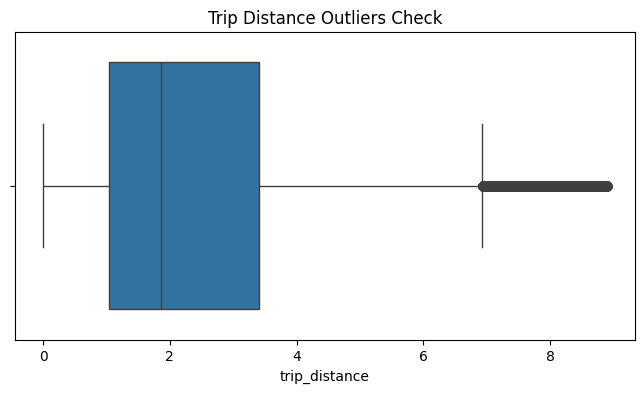

In [23]:
q1 = df['trip_distance'].quantile(0.25)
q3 = df['trip_distance'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df = df[(df['trip_distance'] >= lower_bound) & (df['trip_distance'] <= upper_bound)]

# Visualize
plt.figure(figsize=(8,4))
sns.boxplot(x=df['trip_distance'])
plt.title("Trip Distance Outliers Check")
plt.show()


## 📊 Exploratory Data Analysis (EDA)
In this section, you are expected to:

1. **Think of 5 questions** you want to answer about the dataset:
   - 2 Easy
   - 1 Medium
   - 2 Complex

2. For each question:
   - Choose a suitable **visualization** (bar plot, scatter plot, histogram, heatmap, etc.)
   - Write a **brief reasoning** for why that visual was chosen.

Try to explore insights that can help you understand patterns, trends, or anomalies in the dataset. Choose the most suitable library for you.

### Resources
- [Choosing the right visual](https://www2.insightsoftware.com/dashboard-design-guide/using-the-right-visualizations/)
- [Seaborn](https://seaborn.pydata.org/)
- [Matplotlib](https://matplotlib.org/stable/index.html)

### Question 1

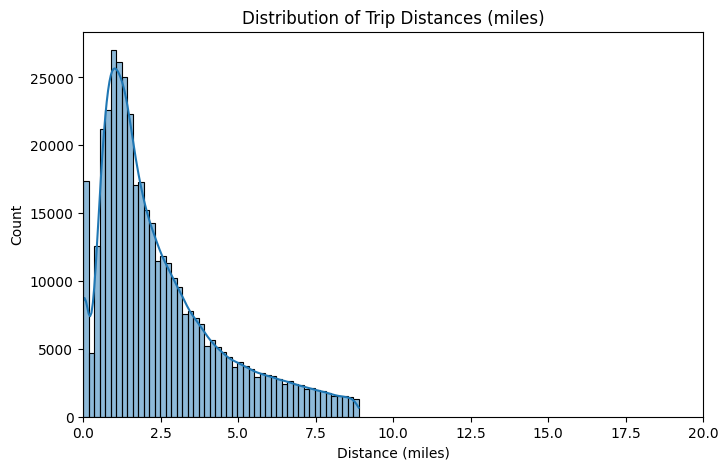

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df["trip_distance"], bins=50, kde=True)
plt.xlim(0,20)  
plt.title("Distribution of Trip Distances (miles)")
plt.xlabel("Distance (miles)")
plt.ylabel("Count")
plt.show()


_Reasoning:_Trip distance tells us how far passengers use green taxis. By calculating the average, we see the “typical” ride length. This helps understand passenger behavior (short trips vs. long trips) and also gives drivers/businesses an idea of fuel usage and time spent per ride.

### Question 2

In [25]:
avg_fare = df["fare_amount"].mean()
print("💵 Average Fare Amount:", round(avg_fare, 2))


💵 Average Fare Amount: 12.7


_Reasoning:_Average fare shows how much passengers typically pay. This is important for understanding affordability (if it's cheap or expensive to ride green taxis?) and also for drivers to predict their net earnings. It also shows if trips are mostly short and cheap or long and costly.

### Question 3

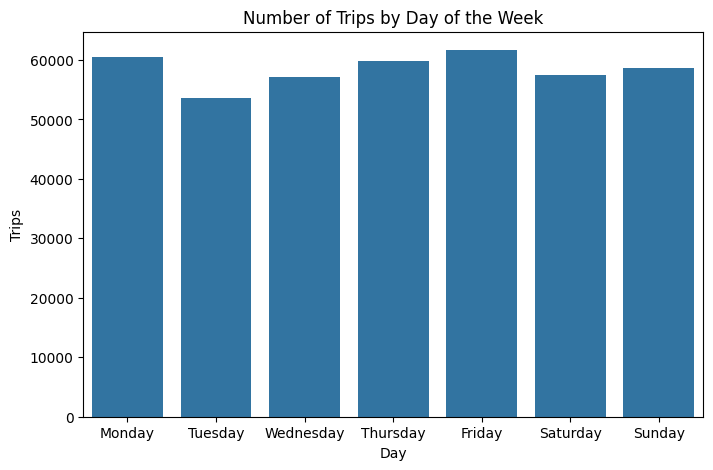

In [26]:
df["day_of_week"] = df["lpep_pickup_datetime"].dt.day_name()

plt.figure(figsize=(8,5))
sns.countplot(data=df, x="day_of_week", order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.title("Number of Trips by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Trips")
plt.show()


_Reasoning:_This plot shows how trip demand changes across the week. It helps identify busy days (like weekends or weekdays) and gives insight into rider behavior and peak activity times.

### Question 4

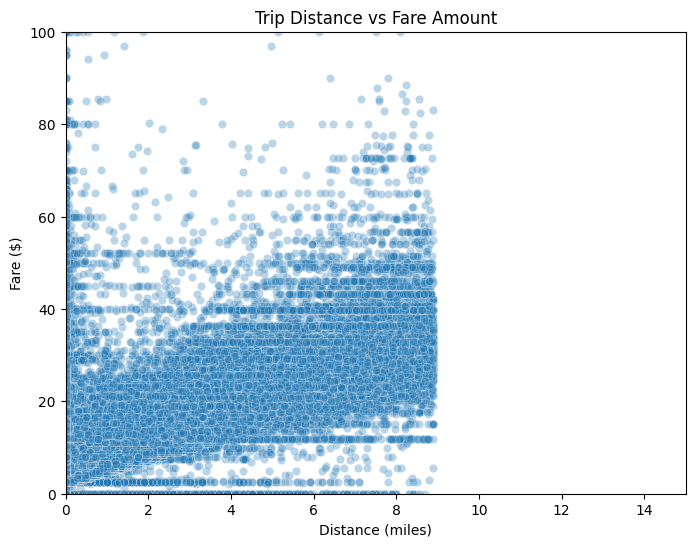

In [27]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="trip_distance", y="fare_amount", alpha=0.3)
plt.xlim(0,15)
plt.ylim(0,100)
plt.title("Trip Distance vs Fare Amount")
plt.xlabel("Distance (miles)")
plt.ylabel("Fare ($)")
plt.show()


_Reasoning:_This scatter plot checks the relationship between trip distance and fare. We expect longer trips to usually cost more, but limiting the axes (0–15 miles, 0–100$) helps focus on the majority of realistic trips and removes extreme outliers that could hide the main trend.

### Question 5

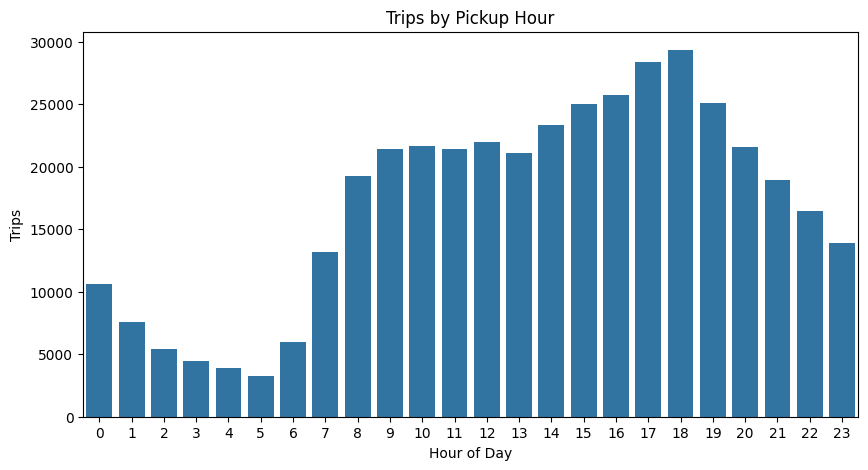

In [28]:
df["pickup_hour"] = df["lpep_pickup_datetime"].dt.hour

plt.figure(figsize=(10,5))
sns.countplot(data=df, x="pickup_hour")
plt.title("Trips by Pickup Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Trips")
plt.show()


_Reasoning:_The busiest pickup time highlights peak demand (rush hours, late-night trips). Important for planning driver availability and traffic management.

## 🛠️ Feature Engineering (EDA)
In this section, you are required to:
- Create **two new columns** derived from the existing dataset.
- Explain the reasoning behind creating each feature.

The goal is to enhance the dataset with informative features that could improve your analysis or modeling.

### Resources
- [Feature Engineering](https://www.geeksforgeeks.org/machine-learning/what-is-feature-engineering/)

### Feature 1

In [ ]:
df["trip_duration_min"] = (df["lpep_dropoff_datetime"] - df["lpep_pickup_datetime"]).dt.total_seconds() / 60
df = df[(df["trip_duration_min"] > 0) & (df["trip_duration_min"] <= 180)]

df["trip_duration_min"].describe()


count    405316.000000
mean         14.087881
std          10.436408
min           0.016667
25%           6.916667
50%          11.533333
75%          18.350000
max         177.316667
Name: trip_duration_min, dtype: float64

_Reasoning:_Duration is a key measure of how long trips take, which helps identify normal vs. abnormal rides (e.g., too short/too long).
It was calculated as the difference between drop-off and pick-up times, converted into minutes.

### Feature 2

In [ ]:
df["speed_mph"] = df["trip_distance"] / (df["trip_duration_min"] / 60)
df = df[(df["speed_mph"] > 0) & (df["speed_mph"] <= 80)]

df[["trip_distance","trip_duration_min","speed_mph"]].head()


,trip_distance,trip_duration_min,speed_mph
0,2.00,12.883333,9.314360
1,3.20,13.250000,14.490566
2,2.99,12.933333,13.871134
3,1.73,6.266667,16.563830
4,3.42,16.516667,12.423814


_Reasoning:_Speed shows travel efficiency and helps detect unrealistic trips (e.g. super slow or too fast to be real).
It's derived from distance ÷ time, expressed in mph.